In [2]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2 MB 177 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.4 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
plotnine 0.6.0 requires scipy>=1.2.0, but you have scipy 1.1.0 which is incompatible.
jax 0.2.25 requires scipy>=1.2.1, but you have scipy 1.1.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns
import cv2
from scipy import misc
from scipy.misc import imresize , imread



In [4]:
import os
import os, os.path
os.environ['KAGGLE_USERNAME']="mohameddany"
os.environ['KAGGLE_Key']="179b1b409a9994b74b3b6351cbd6c7a4"
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [00:50<00:00, 58.8MB/s]
100% 3.10G/3.10G [00:50<00:00, 65.7MB/s]


In [5]:
from zipfile import ZipFile

file_name="/content/breast-histopathology-images.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('extracted')


extracted


In [6]:
files = os.listdir("/content/10258/1")
print(len(files))


108


In [7]:
imagePatches = glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches[0:50]:
    print(filename)
print(len(imagePatches))

/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x801_y1451_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1851_y451_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x601_y2251_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2101_y2551_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2351_y701_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1651_y2601_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1701_y351_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1201_y551_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x551_y501_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2851_y1601_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x951_y651_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x851_y1151_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x751_y2501_class0.png
/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2701_y1301_c

(-0.5, 49.5, 49.5, -0.5)

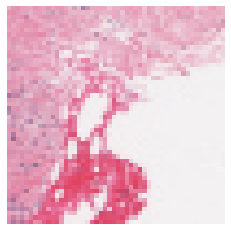

In [8]:
image = cv2.imread("IDC_regular_ps50_idx5/9135/1/9135_idx5_x1701_y1851_class1.png")
image = cv2.resize(image, (50,50))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

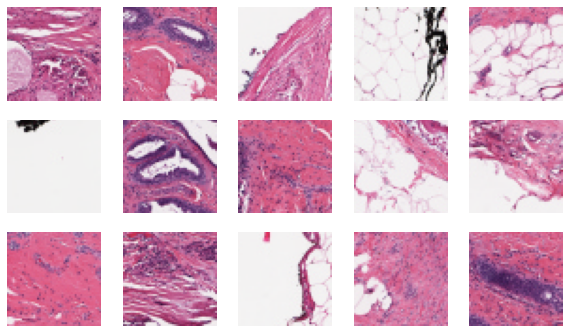

In [9]:
Sample = imagePatches
i = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=None, hspace=None)
for l in Sample[0:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (50, 50)) 
    plt.subplot(5, 5, i+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    i+= 1

In [10]:
zero = '*class0.png'
One = '*class1.png'
zero = fnmatch.filter(imagePatches, zero)
One = fnmatch.filter(imagePatches, One)
print("IDC(-)\n\n",zero[0:10],'\n')
print("IDC(+)\n\n",One[0:10])

IDC(-)

 ['/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x801_y1451_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1851_y451_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x601_y2251_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2101_y2551_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2351_y701_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1651_y2601_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1701_y351_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x1201_y551_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x551_y501_class0.png', '/content/IDC_regular_ps50_idx5/10308/0/10308_idx5_x2851_y1601_class0.png'] 

IDC(+)

 ['/content/IDC_regular_ps50_idx5/10308/1/10308_idx5_x1451_y901_class1.png', '/content/IDC_regular_ps50_idx5/10308/1/10308_idx5_x1851_y1101_class1.png', '/content/IDC_regular_ps50_idx5/10308/1/10308_idx5_x1851_y1301_class1.png',

In [11]:
def proc_images(start,end):
    x = []
    y = []
    for img in imagePatches[start:end]:
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (50,50), interpolation=cv2.INTER_CUBIC))
        if img in zero:
            y.append(0)
        elif img in One:
            y.append(1)
    return x,y

In [12]:
X,Y = proc_images(0,30000)
df = pd.DataFrame()
df["images"]=X
df["labels"]=Y
X2=df["images"]
Y2=df["labels"]
X2=np.array(X2)
imgs0=[]
imgs1=[]
imgs0 = X2[Y2==0]
imgs1 = X2[Y2==1] 



In [13]:
print("Total number of IDC(-):",df["labels"].value_counts()[0])
print("Totla number of IDC(+):",df["labels"].value_counts()[1])
print("Total number of images :",df["images"].count())
print('precentage of Negative images:',np.mean(df["labels"]==0)*100,"%")
print('precentage of Positive images: ', np.mean(df["labels"]==1)*100,"%")
print("image shape : ", df["images"][0].shape)

Total number of IDC(-): 22352
Totla number of IDC(+): 7648
Total number of images : 30000
precentage of Negative images: 74.50666666666666 %
precentage of Positive images:  25.493333333333336 %
image shape :  (50, 50, 3)


In [14]:
df.head(20)

,images,labels
0,"[[[160, 116, 190], [165, 126, 203], [131, 85, ...",0
1,"[[[122, 63, 108], [117, 56, 97], [108, 51, 89]...",0
2,"[[[243, 243, 244], [243, 243, 244], [243, 243,...",0
3,"[[[242, 241, 243], [242, 241, 239], [237, 238,...",0
4,"[[[160, 123, 225], [163, 123, 220], [155, 111,...",0
5,"[[[239, 239, 237], [237, 236, 242], [239, 239,...",0
6,"[[[119, 62, 106], [116, 58, 103], [147, 86, 15...",0
7,"[[[126, 81, 188], [150, 118, 208], [175, 145, ...",0
8,"[[[219, 205, 232], [238, 234, 241], [241, 240,...",0
9,"[[[236, 233, 242], [193, 163, 223], [143, 100,...",0


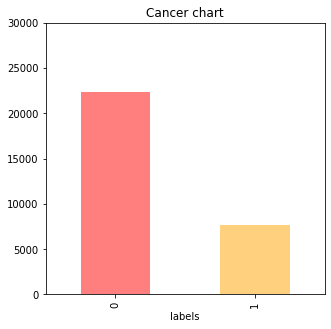

In [15]:
df.groupby(['labels'])['images'].count().plot( figsize=(5,5), kind="bar", color=["red","orange"],alpha =0.5)
plt.ylim([0,30000])
plt.title("Cancer chart")
plt.show()

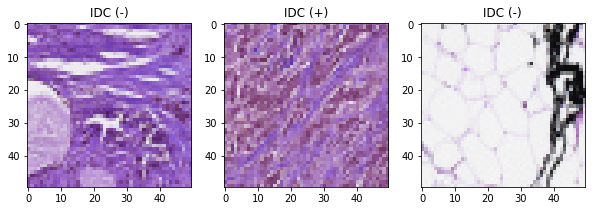

In [16]:
 plt.subplot(1,3,1)
 plt.title('IDC (-)')
 plt.imshow(imgs0[0])
 plt.subplot(1,3,2)
 plt.title('IDC (+)')
 plt.imshow(imgs1[1])
 plt.subplot(1,3,3)
 plt.title("IDC (-)")
 plt.imshow(imgs0[3]) 

In [17]:
X=np.array(X)
X=X/255.0


In [18]:
df.head()

,images,labels
0,"[[[160, 116, 190], [165, 126, 203], [131, 85, ...",0
1,"[[[122, 63, 108], [117, 56, 97], [108, 51, 89]...",0
2,"[[[243, 243, 244], [243, 243, 244], [243, 243,...",0
3,"[[[242, 241, 243], [242, 241, 239], [237, 238,...",0
4,"[[[160, 123, 225], [163, 123, 220], [155, 111,...",0


In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import datasets, layers, models
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [20]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [21]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 50, 50, 3) (6000, 50, 50, 3) (24000, 2) (6000, 2)


In [22]:
num_classes=2
input_shape=(50,50,3)

In [23]:
model = tf.keras.models.Sequential()

In [24]:
#input layer
model.add(tf.keras.layers.Flatten(input_shape=input_shape))

In [25]:
#hidden layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [26]:
model.add(tf.keras.layers.Dense(128, activation='relu'))

In [27]:
model.add(tf.keras.layers.Dense(16, activation='relu'))

In [28]:
model.add(tf.keras.layers.Dense(16, activation='relu'))

In [29]:
model.add(tf.keras.layers.Dropout(0.2))

In [30]:
#output layer
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
750/750 [==============================] - 7s 8ms/step - loss: 0.4772 - accuracy: 0.7883
Epoch 2/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3988 - accuracy: 0.8311
Epoch 3/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3803 - accuracy: 0.8375
Epoch 4/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3728 - accuracy: 0.8388
Epoch 5/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3689 - accuracy: 0.8395
Epoch 6/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3661 - accuracy: 0.8418
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3650 - accuracy: 0.8427
Epoch 8/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3679 - accuracy: 0.8400
Epoch 9/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3607 - accuracy: 0.8428
Epoch 10/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3633 - accuracy: 0.8430

In [33]:
model.predict(X_test)

array([[0.99177307, 0.00822688],
       [0.5846496 , 0.4153504 ],
       [0.00955166, 0.9904483 ],
       ...,
       [0.98186654, 0.01813353],
       [0.04850421, 0.9514958 ],
       [0.9987386 , 0.00126148]], dtype=float32)

In [34]:
val_loss, val_acc = model.evaluate(X_test, y_test)

188/188 [==============================] - 1s 3ms/step - loss: 0.3535 - accuracy: 0.8393
